In [4]:
import pandas as pd
import numpy as np
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#!pip3 install plotly
import plotly.graph_objects as go


In [5]:
df = pd.read_csv('WorkOrderBeamDataProject2020.csv')

In [6]:
df['SerialNumber'].nunique() #16301 unique serial no.

16301

In [7]:
df.PipelineFamily.nunique() ## 52 machines

52

In [8]:
pipeline = df["PipelineFamily"].value_counts()

In [66]:
#pipeline

# machine types sorted

# concat worktype & component type

In [9]:
df['data_WO_CompoCat'] = df['WorkType'].astype(str) + df['ComponentCategory']

In [10]:
Mach_WO_CompCat = df.groupby('PipelineFamily')['data_WO_CompoCat'].value_counts().unstack().fillna('')
Mach_WO_CompCat.to_csv('Unique_Machine.csv')

In [11]:
data =  pd.read_csv('Unique_Machine.csv')

In [12]:
data = data.fillna(0)

# sorting based on Maintanence, repair, PM, Other, Rebuild

In [13]:
data.dtypes
data_maintain = data[['PipelineFamily','MaintainADMINISTRATION','MaintainDRIVETRAIN','MaintainELECTRICAL','MaintainENGINE', \
                     'MaintainHYDRAULIC SYSTEM', 'MaintainIMPLEMENT CONTROLS', 'MaintainIMPLEMENTS', 'MaintainMACHINE', \
                     'MaintainOTHERS', 'MaintainTRANSMISSION & DRIVE LINE']]
data_maintain

,PipelineFamily,MaintainADMINISTRATION,MaintainDRIVETRAIN,MaintainELECTRICAL,MaintainENGINE,MaintainHYDRAULIC SYSTEM,MaintainIMPLEMENT CONTROLS,MaintainIMPLEMENTS,MaintainMACHINE,MaintainOTHERS,MaintainTRANSMISSION & DRIVE LINE
0,800 Soil Compactor,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0
1,800 Waste Compactor,0.0,11.0,3.0,24.0,0.0,5.0,15.0,508.0,8.0,5.0
2,ADT,0.0,56.0,41.0,217.0,0.0,27.0,17.0,3191.0,101.0,136.0
3,Backhoe Loaders,0.0,9.0,64.0,135.0,2.0,90.0,390.0,2034.0,107.0,4.0
4,CCE Wheel Loaders,0.0,0.0,1.0,4.0,0.0,1.0,3.0,97.0,16.0,3.0
5,CCE HEX Mini,0.0,1.0,2.0,1.0,0.0,1.0,7.0,119.0,1.0,0.0
6,CCE Multi Terrain Loaders,0.0,0.0,0.0,2.0,0.0,0.0,0.0,6.0,0.0,0.0
7,CCE Skid Steer Loaders,0.0,0.0,3.0,6.0,0.0,0.0,0.0,127.0,2.0,0.0
8,CCE Track Loaders,0.0,3.0,1.0,3.0,0.0,2.0,1.0,94.0,2.0,0.0
9,CT660,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0


<AxesSubplot:ylabel='PipelineFamily'>

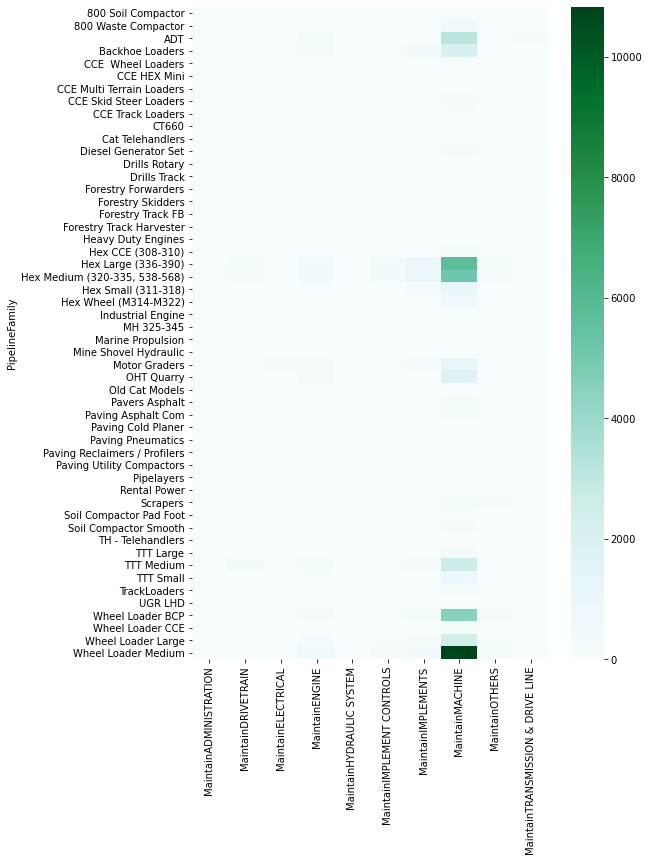

In [14]:
data_maintain = data_maintain.fillna('0')
data_maintain.dtypes

data_maintain['MaintainDRIVETRAIN'] = data_maintain['MaintainDRIVETRAIN'].apply(int)
data_maintain['MaintainADMINISTRATION'] = data_maintain['MaintainADMINISTRATION'].apply(int)
data_maintain['MaintainELECTRICAL'] = data_maintain['MaintainELECTRICAL'].apply(int)
data_maintain['MaintainENGINE'] = data_maintain['MaintainENGINE'].apply(int)
data_maintain['MaintainHYDRAULIC SYSTEM'] = data_maintain['MaintainHYDRAULIC SYSTEM'].apply(int)
data_maintain['MaintainIMPLEMENT CONTROLS'] = data_maintain['MaintainIMPLEMENT CONTROLS'].apply(int)
data_maintain['MaintainIMPLEMENTS'] = data_maintain['MaintainIMPLEMENTS'].apply(int)
data_maintain['MaintainMACHINE'] = data_maintain['MaintainMACHINE'].apply(int)
data_maintain['MaintainOTHERS'] = data_maintain['MaintainOTHERS'].apply(int)
data_maintain['MaintainTRANSMISSION & DRIVE LINE'] = data_maintain['MaintainTRANSMISSION & DRIVE LINE'].apply(int)

data_maintain.dtypes

hp_DM = pd.pivot_table(data_maintain, index=['PipelineFamily'])
plt.figure(figsize=(8,12))
sns.heatmap(hp_DM, cmap="BuGn")

<AxesSubplot:ylabel='PipelineFamily'>

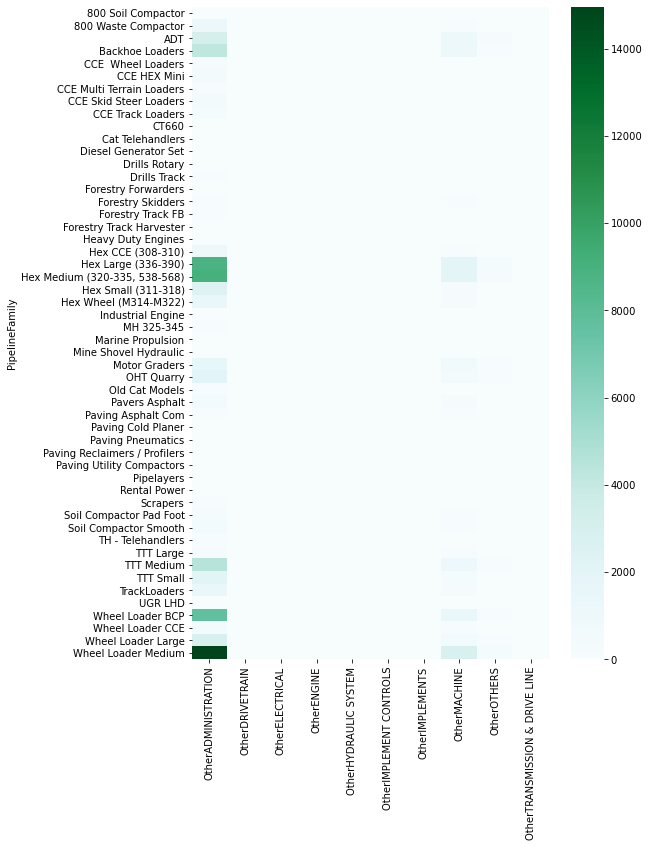

In [15]:
data_other = data[['PipelineFamily','OtherADMINISTRATION', 'OtherDRIVETRAIN', 'OtherELECTRICAL','OtherENGINE', \
                   'OtherHYDRAULIC SYSTEM', 'OtherIMPLEMENT CONTROLS', 'OtherIMPLEMENTS', 'OtherMACHINE', \
                    'OtherOTHERS', 'OtherTRANSMISSION & DRIVE LINE']]

data_other = data_other.fillna('0')

data_other['OtherADMINISTRATION'] = data_other['OtherADMINISTRATION'].apply(int)
data_other['OtherDRIVETRAIN'] = data_other['OtherDRIVETRAIN'].apply(int)
data_other['OtherELECTRICAL'] = data_other['OtherELECTRICAL'].apply(int)
data_other['OtherENGINE'] = data_other['OtherENGINE'].apply(int)
data_other['OtherHYDRAULIC SYSTEM'] = data_other['OtherHYDRAULIC SYSTEM'].apply(int)
data_other['OtherIMPLEMENT CONTROLS'] = data_other['OtherIMPLEMENT CONTROLS'].apply(int)
data_other['OtherIMPLEMENTS'] = data_other['OtherIMPLEMENTS'].apply(int)
data_other['OtherMACHINE'] = data_other['OtherMACHINE'].apply(int)
data_other['OtherOTHERS'] = data_other['OtherOTHERS'].apply(int)
data_other['OtherTRANSMISSION & DRIVE LINE'] = data_other['OtherTRANSMISSION & DRIVE LINE'].apply(int)

data_other.dtypes

hp_OT = pd.pivot_table(data_other, index=['PipelineFamily'])
plt.figure(figsize=(8,12))
sns.heatmap(hp_OT, cmap="BuGn")


<AxesSubplot:ylabel='PipelineFamily'>

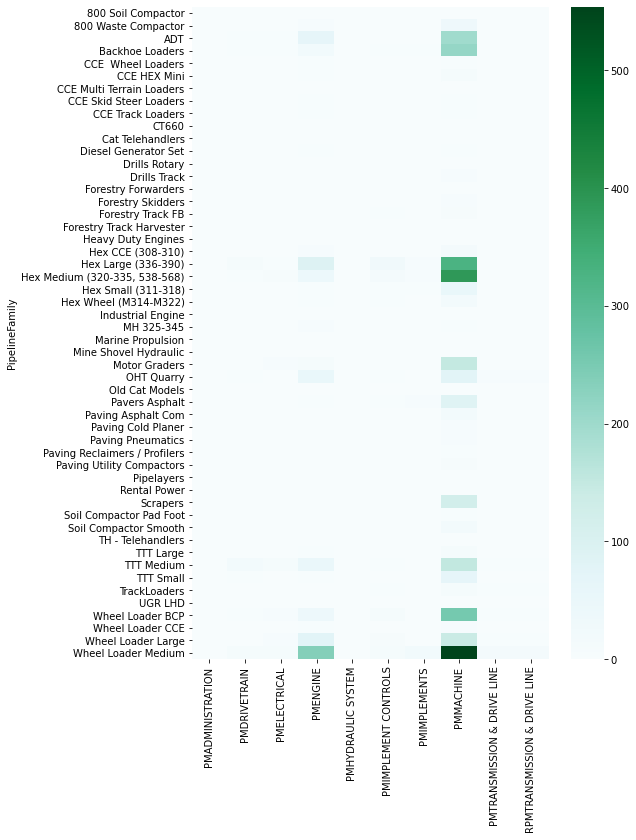

In [16]:
data_PM = data[['PipelineFamily','PMADMINISTRATION', 'PMDRIVETRAIN','PMELECTRICAL', 'PMENGINE', 'PMHYDRAULIC SYSTEM', \
                'PMIMPLEMENT CONTROLS', 'PMIMPLEMENTS','PMMACHINE','PMTRANSMISSION & DRIVE LINE']]

data_PM = data_PM.fillna('0')

data_PM['PMADMINISTRATION'] = data_PM['PMADMINISTRATION'].apply(int)
data_PM['PMDRIVETRAIN'] = data_PM['PMDRIVETRAIN'].apply(int)
data_PM['PMELECTRICAL'] = data_PM['PMELECTRICAL'].apply(int)
data_PM['PMENGINE'] = data_PM['PMENGINE'].apply(int)
data_PM['PMHYDRAULIC SYSTEM'] = data_PM['PMHYDRAULIC SYSTEM'].apply(int)
data_PM['PMIMPLEMENT CONTROLS'] = data_PM['PMIMPLEMENT CONTROLS'].apply(int)
data_PM['PMIMPLEMENTS'] = data_PM['PMIMPLEMENTS'].apply(int)
data_PM['PMMACHINE'] = data_PM['PMMACHINE'].apply(int)
data_PM['RPMTRANSMISSION & DRIVE LINE'] = data_PM['PMTRANSMISSION & DRIVE LINE'].apply(int)

data_PM.dtypes

hp_PM = pd.pivot_table(data_PM, index=['PipelineFamily'])
plt.figure(figsize=(8,12))
sns.heatmap(hp_PM, cmap="BuGn")

<AxesSubplot:ylabel='PipelineFamily'>

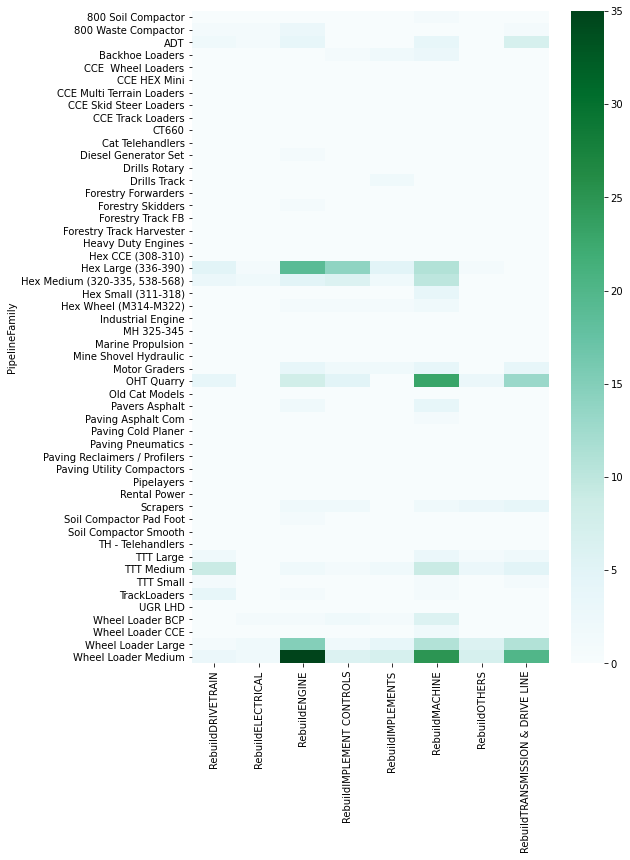

In [17]:
data_Rebuild = data[['PipelineFamily','RebuildDRIVETRAIN', 'RebuildELECTRICAL','RebuildENGINE', 'RebuildIMPLEMENT CONTROLS', \
                     'RebuildIMPLEMENTS', 'RebuildMACHINE', 'RebuildOTHERS', 'RebuildTRANSMISSION & DRIVE LINE']]

data_Rebuild = data_Rebuild.fillna('0')

data_Rebuild['RebuildDRIVETRAIN'] = data_Rebuild['RebuildDRIVETRAIN'].apply(int)
data_Rebuild['RebuildELECTRICAL'] = data_Rebuild['RebuildELECTRICAL'].apply(int)
data_Rebuild['RebuildENGINE'] = data_Rebuild['RebuildENGINE'].apply(int)
data_Rebuild['RebuildIMPLEMENT CONTROLS'] = data_Rebuild['RebuildIMPLEMENT CONTROLS'].apply(int)
data_Rebuild['RebuildIMPLEMENTS'] = data_Rebuild['RebuildIMPLEMENTS'].apply(int)
data_Rebuild['RebuildMACHINE'] = data_Rebuild['RebuildMACHINE'].apply(int)
data_Rebuild['RebuildOTHERS'] = data_Rebuild['RebuildOTHERS'].apply(int)
data_Rebuild['RebuildTRANSMISSION & DRIVE LINE'] = data_Rebuild['RebuildTRANSMISSION & DRIVE LINE'].apply(int)


data_Rebuild.dtypes

hp_Rebuild = pd.pivot_table(data_Rebuild, index=['PipelineFamily'])
plt.figure(figsize=(8,12))
sns.heatmap(hp_Rebuild, cmap="BuGn")

<AxesSubplot:ylabel='PipelineFamily'>

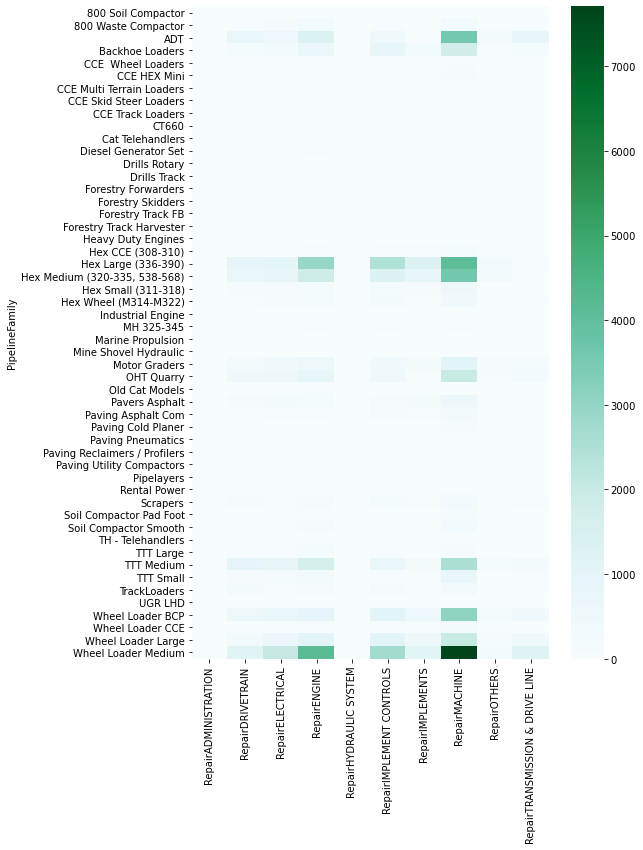

In [18]:
data_Repair = data[['PipelineFamily','RepairADMINISTRATION', 'RepairDRIVETRAIN', 'RepairELECTRICAL','RepairENGINE',
                    'RepairHYDRAULIC SYSTEM','RepairIMPLEMENT CONTROLS','RepairIMPLEMENTS', 'RepairMACHINE', \
                    'RepairOTHERS','RepairTRANSMISSION & DRIVE LINE']]

data_Repair = data_Repair.fillna('0')

data_Repair['RepairADMINISTRATION'] = data_Repair['RepairADMINISTRATION'].apply(int)
data_Repair['RepairDRIVETRAIN'] = data_Repair['RepairDRIVETRAIN'].apply(int)
data_Repair['RepairELECTRICAL'] = data_Repair['RepairELECTRICAL'].apply(int)
data_Repair['RepairENGINE'] = data_Repair['RepairENGINE'].apply(int)
data_Repair['RepairHYDRAULIC SYSTEM'] = data_Repair['RepairHYDRAULIC SYSTEM'].apply(int)
data_Repair['RepairIMPLEMENT CONTROLS'] = data_Repair['RepairIMPLEMENT CONTROLS'].apply(int)
data_Repair['RepairIMPLEMENTS'] = data_Repair['RepairIMPLEMENTS'].apply(int)
data_Repair['RepairMACHINE'] = data_Repair['RepairMACHINE'].apply(int)
data_Repair['RepairOTHERS'] = data_Repair['RepairOTHERS'].apply(int)
data_Repair['RepairTRANSMISSION & DRIVE LINE'] = data_Repair['RepairTRANSMISSION & DRIVE LINE'].apply(int)


data_Repair.dtypes

hp_Repair = pd.pivot_table(data_Repair, index=['PipelineFamily'])
plt.figure(figsize=(8,12))
sns.heatmap(hp_Repair, cmap="BuGn")

In [19]:
df

,WorkOrderNumber,InvoiceDate,OpenDate,CloseDate,SerialNumber,PipelineFamily,PipelineBaseModel,TotalWorkOrderSell,TotalLabourHours,CostControlCode,...,TotalParts,PartNumbersCount,Engine_Parts,DriveTrain_Parts,Hydraulics_Parts,Maintenance_Parts,FilterFluid_Parts,GET_Parts,Structural_Parts,data_WO_CompoCat
0,95454PT,7/8/2019,6/27/2019,7/8/2019,0KZL00437,Wheel Loader Medium,980,451.50,2.0,AC,...,0.00,0,0,0,0,0,0,0,0,RepairMACHINE
1,95455PT,11/12/2019,6/28/2019,11/11/2019,0WGL00333,"Hex Medium (320-335, 538-568)",326,3361.75,12.0,FS,...,1393.79,8,1,0,0,1,0,0,0,RepairENGINE
2,95456PT,9/7/2019,6/28/2019,9/6/2019,0TWX01591,Wheel Loader Large,988,753.10,3.0,FS,...,301.75,2,0,0,0,0,0,0,1,RepairMACHINE
3,95457PT,7/11/2019,7/2/2019,7/11/2019,0TWR02873,Wheel Loader BCP,930,2961.83,10.5,FS,...,1074.33,18,1,0,1,0,0,0,0,RepairENGINE
4,95458PT,8/6/2019,7/3/2019,8/6/2019,0KRS01952,Wheel Loader Medium,980,1002.51,4.0,FS,...,335.71,3,0,0,1,0,0,0,0,RepairMACHINE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257739,74835PT,8/29/2018,8/16/2018,8/29/2018,0W7K01090,Wheel Loader Medium,980,8864.82,9.5,FS,...,7504.82,7,1,0,0,0,0,0,0,RepairENGINE
257740,74835TI,10/25/2016,10/14/2016,10/24/2016,04L500114,Forestry Skidders,545,5289.33,13.0,LU,...,923.69,17,0,0,1,0,1,0,1,MaintainMACHINE
257741,74837PT,9/18/2018,8/17/2018,9/18/2018,0BXY04342,Wheel Loader Large,988,1672.50,10.5,FS,...,0.00,0,0,0,0,0,0,0,0,RepairIMPLEMENTS
257742,74838PT,9/26/2018,8/18/2018,9/26/2018,0BDA00110,OHT Quarry,773,705.00,5.0,FS,...,0.00,0,0,0,0,0,0,0,0,RepairENGINE


In [20]:
data_refined_SN_WO = df.groupby(['SerialNumber'])["WorkOrderNumber"].count()

In [21]:
data_refined_SN_WO

SerialNumber
001X04434             1
004X04475             2
00FW00116            29
00PH00738            43
014S00993             2
                     ..
CAT0259BEYYZ02733     2
CAT0262CLMST04242     1
CAT0906MCZ6600272     1
TGG900184             1
TKL200251             1
Name: WorkOrderNumber, Length: 16301, dtype: int64

In [22]:
df['year'] = pd.DatetimeIndex(df['InvoiceDate']).year

In [23]:
df2 = df[['WorkOrderNumber','SerialNumber','PipelineFamily','data_WO_CompoCat','year']]
df2['Pipeline_WORKtype_CompoCat'] = df2['PipelineFamily'].astype(str) + df2['data_WO_CompoCat']
df3 = df2.drop(['PipelineFamily', 'data_WO_CompoCat'], axis=1)
df3

<ipython-input-23-a8a1612786c3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Pipeline_WORKtype_CompoCat'] = df2['PipelineFamily'].astype(str) + df2['data_WO_CompoCat']


,WorkOrderNumber,SerialNumber,year,Pipeline_WORKtype_CompoCat
0,95454PT,0KZL00437,2019,Wheel Loader MediumRepairMACHINE
1,95455PT,0WGL00333,2019,"Hex Medium (320-335, 538-568)RepairENGINE"
2,95456PT,0TWX01591,2019,Wheel Loader LargeRepairMACHINE
3,95457PT,0TWR02873,2019,Wheel Loader BCPRepairENGINE
4,95458PT,0KRS01952,2019,Wheel Loader MediumRepairMACHINE
...,...,...,...,...
257739,74835PT,0W7K01090,2018,Wheel Loader MediumRepairENGINE
257740,74835TI,04L500114,2016,Forestry SkiddersMaintainMACHINE
257741,74837PT,0BXY04342,2018,Wheel Loader LargeRepairIMPLEMENTS
257742,74838PT,0BDA00110,2018,OHT QuarryRepairENGINE


In [24]:
seg_Pipe = df3.groupby(['SerialNumber','Pipeline_WORKtype_CompoCat'])['year'].value_counts().unstack().fillna('0')
#seg_workcomp = df2.groupby(['SerialNumber','data_WO_CompoCat'])['year'].value_counts().unstack().fillna('0')
seg_Pipe.to_csv('seg_Pipe.csv')

In [25]:
df4 = pd.read_csv('seg_Pipe.csv')
df4.dtypes

df4['2016'] = df4['2016'].apply(int)
df4['2017'] = df4['2017'].apply(int)
df4['2018'] = df4['2018'].apply(int)
df4['2019'] = df4['2019'].apply(int)
df4['2020'] = df4['2020'].apply(int)
df4.dtypes

SerialNumber                  object
Pipeline_WORKtype_CompoCat    object
2016                           int64
2017                           int64
2018                           int64
2019                           int64
2020                           int64
dtype: object

<AxesSubplot:ylabel='Pipeline_WORKtype_CompoCat'>

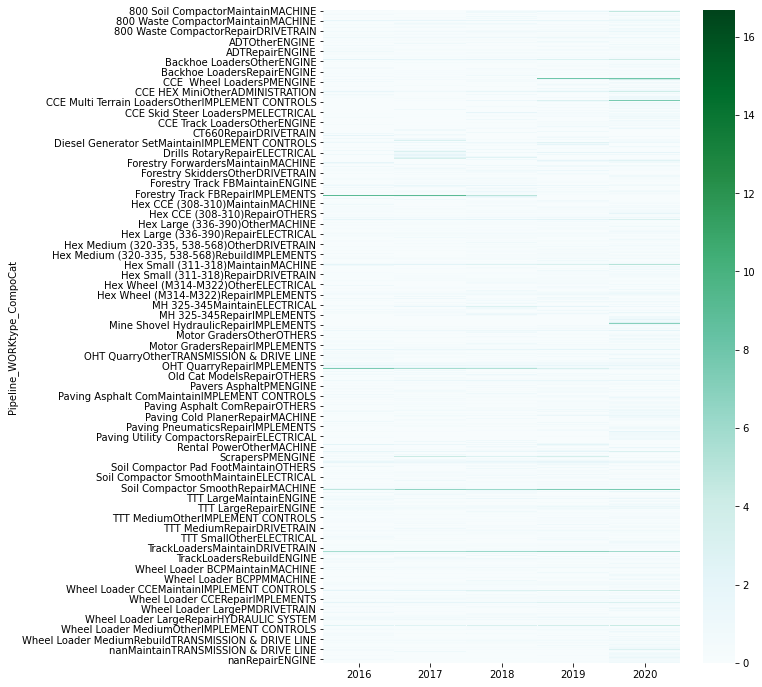

In [26]:
df4_trend = pd.pivot_table(df4, index=['Pipeline_WORKtype_CompoCat'])
plt.figure(figsize=(8,12))
sns.heatmap(df4_trend, cmap="BuGn")

In [29]:
df4

,SerialNumber,Pipeline_WORKtype_CompoCat,2016,2017,2018,2019,2020
0,001X04434,OHT QuarryRepairENGINE,1,0,0,0,0
1,004X04475,TTT MediumRepairMACHINE,1,0,0,0,0
2,00FW00116,Forestry ForwardersMaintainMACHINE,4,0,0,0,0
3,00FW00116,Forestry ForwardersOtherADMINISTRATION,9,0,0,0,0
4,00FW00116,Forestry ForwardersOtherELECTRICAL,1,0,0,0,0
...,...,...,...,...,...,...,...
79365,CAT0259BEYYZ02733,CCE Track LoadersRepairENGINE,0,0,0,0,1
79366,CAT0262CLMST04242,CCE Skid Steer LoadersOtherMACHINE,1,0,0,0,0
79367,CAT0906MCZ6600272,CCE Wheel LoadersRepairMACHINE,0,1,0,0,0
79368,TGG900184,Hex CCE (308-310)MaintainMACHINE,0,0,0,0,1


In [118]:
def comp_year(df4):
    
    if(df4['2016']!=0):
            return 'lost-2016'
    elif(df4['2017']!=0 & df4['2016']==0 & df4['2018']==0 & df4['2019']==0 & df4['2020']==0):
            return 'lost-2017'
    elif(df4['2018']!=0 & df4['2017']==0 & df4['2016']==0 & df4['2019']==0 & df4['2020']==0):
            return 'lost-2018'  
    elif(df4['2019']!=0 & df4['2017']==0 & df4['2018']==0 & df4['2016']==0 & df4['2020']==0):
            return 'lost-2019' 
    elif(df4['2020']!=0 & df4['2017']==0 & df4['2018']==0 & df4['2019']==0 & df4['2016']==0):
            return 'new-2020'
    elif(df4[df['2016','2017','2018','2019']!=0]):
            return 'stable'
    
df4['SerialNo_comp'] = df4.apply(comp_year, axis = 1)

SerialNumber                  object
Pipeline_WORKtype_CompoCat    object
2016                           int64
2017                           int64
2018                           int64
2019                           int64
2020                           int64
SerialNo_comp                 object
dtype: object

In [119]:
df4.to_csv('sort.csv')

In [80]:
df_1 = pd.read_csv('aug_22_final_smu_cities.csv')

C:\Users\Indrani B\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [81]:
unqiue_SN_Wo = df_1.groupby(['SerialNumber'])["OwnerCustomerNumber"].count()
unqiue_SN_Wo

SerialNumber
01X04420      16
01X04434     561
04X04475      62
0FW00116    1213
0PH00738     576
            ... 
ZML00278     852
ZML00544     964
ZML00546     761
ZML00547    1049
ZML00553    1123
Name: OwnerCustomerNumber, Length: 21211, dtype: int64

In [85]:
df_1['Serial_NO']  = df_1['SerialNumber'].isin(df['SerialNumber'])
common_SN_1 = df_1.loc[df_1['Serial_NO'] == True]
#common_SN_1.SerialNumber.nunique() -- 87 unique Serial NOs. 
df['Serial_NO']  = df['SerialNumber'].isin(df_1['SerialNumber'])
common_SN = df.loc[df['Serial_NO'] == True]
#common_SN.SerialNumber.nunique() -- 87 unqiue Serial Nos. 

In [93]:
df_1[['SerialNumber','OwnerCustomerNumber']]

,SerialNumber,OwnerCustomerNumber
0,01X04420,1237275
1,01X04420,1237275
2,01X04420,1237275
3,01X04420,1237275
4,01X04420,1237275
...,...,...
10934786,ZML00553,4668040
10934787,ZML00553,4668040
10934788,ZML00553,4668040
10934789,ZML00553,4668040


In [95]:
df[['SerialNumber','WorkOrderNumber']]

,SerialNumber,WorkOrderNumber
0,0KZL00437,95454PT
1,0WGL00333,95455PT
2,0TWX01591,95456PT
3,0TWR02873,95457PT
4,0KRS01952,95458PT
...,...,...
257739,0W7K01090,74835PT
257740,04L500114,74835TI
257741,0BXY04342,74837PT
257742,0BDA00110,74838PT
